# Data Preparation Week 1 and 2
## Joshua Greenert
## DSC540-T301 Data Preparation
## 8/30/2022

In [9]:
# Create a list, iterate over the list and sort results.  
listOne = [1, 3, 2, 1, 4]
listOne.sort()

# Generate random numbers, add to the list, then print the results.
import random
listTwo = [random.randint(0, 30) for x in range(0, 50)]
listThree = listOne + listTwo

# Sort the new list as well.
listThree.sort()
print(listThree)

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 7, 7, 7, 7, 9, 9, 10, 11, 12, 13, 13, 13, 14, 15, 15, 15, 16, 17, 17, 18, 20, 20, 21, 21, 22, 23, 24, 24, 25, 25, 26, 27, 27, 27, 30]


<AxesSubplot:>

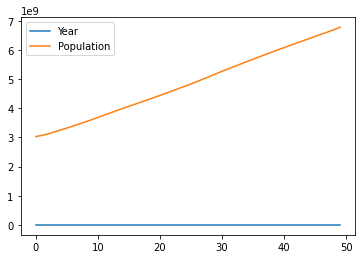

In [31]:
# Create a line chart with Matplotlib and world-population data file.
import pandas as pd
import matplotlib.pyplot as plt

# Read the excel file
worldPopulationData = pd.read_excel('world-population.xlsm')

# Plot the data.
worldPopulationData.plot()

In [39]:
# Data Wrangling with Python: Activity 1 page 17
# Create a list of 100 random numbers.
listRands = [random.randint(0, 30) for x in range(0, 100)]

# Create a list from this list with numbers divisible by 3.
listDivisibles = list(filter(lambda x: (x % 3 == 0), listRands))

# Calculate the difference between the two lists.
listDifferences = len(listRands) - len(listDivisibles)

# Use a loop to find the difference variable three times.
listDifferences = []
for i in range(3):
    listDivisibles = list(filter(lambda x: (x % 3 == 0), listRands))
    listDifferences.append(len(listRands) - len(listDivisibles))

# Find the mean values of the differences.
listMean = sum(listDifferences) / len(listDifferences)
print(f"Mean value of list differences: {listMean}")

Mean value of list differences: 59.0


In [129]:
# Data Wrangling with Python: Activity 2 page 31
# Using alt method to get text to variable
import urllib.request as requests
from urllib.request import urlopen
import re

# Get the text and clean the data
uf = urlopen('https://www.gutenberg.org/files/1342/1342-h/1342-h.htm#link2HCH0001')
multiline_text = str(uf.read())

# Set the indexes to get only the chapter information.
indexChapter1 = multiline_text.find("It is a truth universally acknowledged")
indexEnd = multiline_text.find("its solace was visiting and news.") + len('its solace was visiting and news.')
multiline_text = multiline_text[indexChapter1:indexEnd]

# Replace all html values.
multiline_text = multiline_text.replace("<p>", "")
multiline_text = multiline_text.replace("</p>", "")
multiline_text = multiline_text.replace("<i>", "")
multiline_text = multiline_text.replace("</i>", "")
multiline_text = multiline_text.replace("&ldquo;", "\"")
multiline_text = multiline_text.replace("&rdquo;", "\"")
multiline_text = multiline_text.replace("\\r\\n", "")

# Find the length and type.
print(f"The length of the multiline string is {len(multiline_text)}")
print(f"The type of the multiline string is {type(multiline_text)}")

# Find all the words using the split function.
allWords = multiline_text.split()

# Convert all words to lowercase and remove any additional punctuation.
for i in range(len(allWords)):
    allWords[i] = allWords[i].lower()
    allWords[i] = re.sub(r'[^a-z]', '', allWords[i])

# Get all the unique words from the list.
uniqueWords = dict.fromkeys(allWords).keys()

# Get the counts of each unique word.
finalDict = {}
for i in uniqueWords:
    count = 0
    for j in range(len(allWords)):
        if(i.lower() == allWords[j].lower()):
            count = count +1
    finalDict[i] = count

# Sort the new dictionary.
finalDict = {k: v for k, v in sorted(finalDict.items(), key=lambda item: item[1], reverse = True)}

slicedDict = dict(list(finalDict.items())[:25])
print(slicedDict)

The length of the multiline string is 5121
The type of the multiline string is <class 'str'>
{'you': 31, 'of': 29, 'to': 22, 'a': 21, 'the': 18, 'i': 17, 'and': 16, 'that': 15, 'it': 14, 'is': 14, 'my': 13, 'in': 12, 'be': 11, 'his': 11, 'he': 11, 'for': 11, 'them': 11, 'mr': 10, 'not': 9, 'will': 9, 'so': 8, 'as': 8, 'dear': 8, 'but': 8, 'was': 8}


In [90]:
# Data Wrangling with Python: Activity 3 page 49
from itertools import permutations
from itertools import dropwhile

# Write an expression to generate all permutations.
perm = permutations([0, 1, 2])

# Create a stack.
stack = []

# Print the tuple after asserting it's an instance of tuple.
print("Initial permutation:")
for i in perm:
    assert isinstance(i, tuple)
    i = list(dropwhile(lambda x : x == 0, i))
    print(f"{i} is of type {type(i)}")
    
    # Join elements in list.
    joinedList = ""
    for j in i:
        joinedList =  joinedList + str(j) 
    
    stack.append(int(joinedList))

# Print the stack and determine the type.
print()
print("Each item and type from stack")
for i in stack:
    print(f"{i} is of type {type(i)}")
    

Initial permutation:
[1, 2] is of type <class 'list'>
[2, 1] is of type <class 'list'>
[1, 0, 2] is of type <class 'list'>
[1, 2, 0] is of type <class 'list'>
[2, 0, 1] is of type <class 'list'>
[2, 1, 0] is of type <class 'list'>

Each item and type from stack
12 is of type <class 'int'>
21 is of type <class 'int'>
102 is of type <class 'int'>
120 is of type <class 'int'>
201 is of type <class 'int'>
210 is of type <class 'int'>


In [169]:
# Data Wrangling with Python: Activity 4 page 59
from itertools import zip_longest

# Open the file with read rights.
with open("sales_record.csv", "r") as fd:
    headers = []
    dictionary = {}
    count = 0
    
    # Read each line and set the headers first.  Then set all the elements to the object with the headers.
    for line in fd:
        if(count == 0):
            # set the headers and remove the newline character.
            headers = line.split(",")
            
            for i in headers:
                i = i.replace("\\n", "")
            
            count = count +1
            continue
            
        # Create the values by spliting the line, then add them to the test object.
        values = line.split(",")
        test = zip_longest(headers, values, fillvalue = None)
        
        # Add items to dict in number notation.
        dictionary[count] = test
        count = count +1


('Region', 'Australia and Oceania')
('Country', 'Federated States of Micronesia')
('Item Type', 'Clothes')
('Sales Channel', 'Offline')
('Order Priority', 'H')
('Order Date', '3/28/2011')
('Order ID', '932776868')
('Ship Date', '5/10/2011')
('Units Sold', '8258')
('Unit Price', '109.28')
('Unit Cost', '35.84')
('Total Revenue', '902434.24')
('Total Cost', '295966.72')
('Total Profit\n', '606467.52\n')
